In [3]:
#The Human Reference Protein Interactome Mapping Project
#http://www.interactome-atlas.org/download
#Dataset HI-II-14
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import pandas as pd
import os

In [163]:
#Read file
path_file='HI-II-14.tsv'
edge_list=pd.read_csv('HI-II-14.tsv', delimiter = ' ' ,names=['source','target'])
#Read in edge list as graph G
G = nx.read_edgelist(path_file)

In [9]:
#Find degree sequence p(k)
degree_sequence_nx=[d for n,d in G.degree()]
xx,countss=np.unique(degree_sequence_nx,return_counts=True)

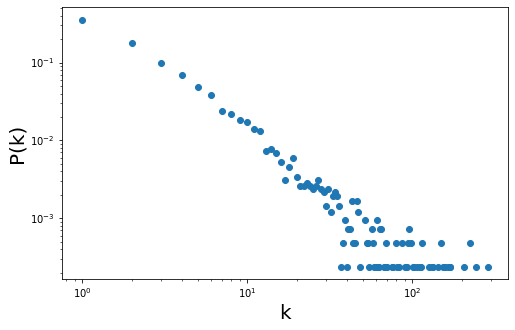

In [10]:
#Plot degree distribution
plt.figure(figsize=(8,5))
plt.loglog(xx,countss/sum(countss),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

In [19]:
#Average shortest path length <L> for each connected component (since graph is disconnected, I cannot simply use nx.average_shortest_path_length(G))
#Syntax is from https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html
i=0
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print("<L> of component "+str(i)+": "+str(nx.average_shortest_path_length(C)))
    i=i+1

<L> of component 0: 4.0899165041596754
<L> of component 1: 1.0
<L> of component 2: 1.0
<L> of component 3: 0
<L> of component 4: 1.0
<L> of component 5: 0
<L> of component 6: 0
<L> of component 7: 1.0
<L> of component 8: 0
<L> of component 9: 0
<L> of component 10: 0
<L> of component 11: 1.0
<L> of component 12: 1.0
<L> of component 13: 1.0
<L> of component 14: 1.0
<L> of component 15: 0
<L> of component 16: 0
<L> of component 17: 1.0
<L> of component 18: 0
<L> of component 19: 1.0
<L> of component 20: 1.0
<L> of component 21: 1.0
<L> of component 22: 0
<L> of component 23: 1.0
<L> of component 24: 1.0
<L> of component 25: 0
<L> of component 26: 1.0
<L> of component 27: 1.0
<L> of component 28: 0
<L> of component 29: 1.0
<L> of component 30: 0
<L> of component 31: 0
<L> of component 32: 0
<L> of component 33: 1.0
<L> of component 34: 1.3333333333333333
<L> of component 35: 1.3333333333333333
<L> of component 36: 1.0
<L> of component 37: 1.3333333333333333
<L> of component 38: 0
<L> of 

In [48]:
#Instead of finding path length of each component in the graph, let's just find the path length of the largest connected component gcc:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True) #sort components by size
G0 = G.subgraph(Gcc[0]) #G0 is giant component

In [41]:
#Average shortest path length of giant component:
nx.average_shortest_path_length(G0)

4.0899165041596754

In [21]:
#Find average clustering coefficient <C>
nx.average_clustering(G)

0.043145037924907675

Text(0.5, 1.0, 'Clustering Coefficient Distribution')

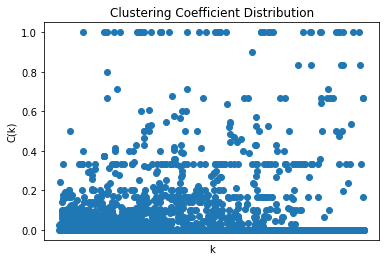

In [23]:
#Find clustering coefficient distribution C(k)
nodes_clustering_coefficent=nx.clustering(G)
plt.plot(list(nodes_clustering_coefficent.values()),'o')
plt.ylabel('C(k)', fontsize=10)
plt.xlabel('k', fontsize=10)
plt.xticks([])
plt.title('Clustering Coefficient Distribution')

<L> for network number 0: 3.70267127028353
<C> for network number 0: 0.03950756312422695
<L> for network number 1: 3.6937850279073157
<C> for network number 1: 0.04019754453281979
<L> for network number 2: 3.690916969694019
<C> for network number 2: 0.04283585706662995
<L> for network number 3: 3.7060327476136967
<C> for network number 3: 0.04308271653981193
<L> for network number 4: 3.6879735166733134
<C> for network number 4: 0.041409966813266065
<L> for network number 5: 3.7018009502375593
<C> for network number 5: 0.04290925634864894
<L> for network number 6: 3.694921748462986
<C> for network number 6: 0.04115864305427199
<L> for network number 7: 3.7045767293808733
<C> for network number 7: 0.041477802417237176
<L> for network number 8: 3.6958839573518474
<C> for network number 8: 0.0418495296916902
<L> for network number 9: 3.699158168978495
<C> for network number 9: 0.03920289020937083


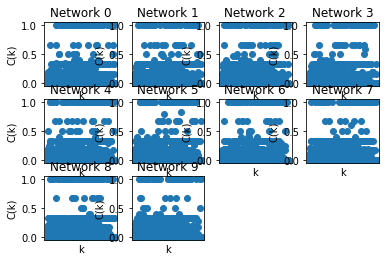

In [165]:
#Rewire network with probability beta and compute <L>, <C>, and C(k)
#The rewiring method used in lecture seems to work only when using the networkx function that creates a small world network.
#I don't see how to implement the same algorithm for a preexisting network.
#This rewiring algorithm is from https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.smallworld.random_reference.html
#It will not be effective if all connected nodes are neighbors of each other.
#Since this graph is not connected, I will find <L> of the gcc rather than for each component in each graph
C,L=[],[]
for s in range(10): #Choose a number of random seeds s to generate different graphs
    G1 = nx.algorithms.smallworld.random_reference(G, niter=1, connectivity=False, seed=s) #rewire original graph according to random seed
    Gcc = sorted(nx.connected_components(G1), key=len, reverse=True) #find gcc
    G0 = G1.subgraph(Gcc[0])
    print("<L> for network number "+str(s)+": "+str(nx.average_shortest_path_length(G0))) #Print <L> of gcc of each network
    print("<C> for network number "+str(s)+": "+str(nx.average_clustering(G1))) #Print <C> of each network
    C.append(nx.average_clustering(G1))
    L.append(nx.average_shortest_path_length(G0))
    nodes_clustering_coefficent=nx.clustering(G1) #Plot C(k) of each network
    plt.subplot(3,4,s+1)
    plt.plot(list(nodes_clustering_coefficent.values()),'o')
    plt.ylabel('C(k)', fontsize=10)
    plt.xlabel('k', fontsize=10)
    plt.xticks([])
    plt.title('Network '+str(s))

In [30]:
#Another rewiring algorithm. I got this implementation from: https://greenteapress.com/complexity2/html/thinkcomplexity2004.html
#This method will also not be effective if all connected nodes are neighbors of each other.
#Once again, I will use <L> of the largest component rather than of each component
def flip(p):
    return np.random.random() < p #returns true with probability p and false with probability 1-p

def rewire(G, p): #p=beta is probability of rewiring a new edge
    nodes = set(G)
    for u,v in G.edges(): #enumerate edges and use flip to decide which ones are rewired
        if flip(p):
            #to compute possible choices, start with set nodes and subtract source node u and its neighbors to avoid self loops and multiple edges
            choices = nodes - {u} - set(G[u])
            #select random choice of node from remaining options
            new_v = np.random.choice(list(choices))
            #remove old edge
            G.remove_edge(u,v)
            #create new edge
            G.add_edge(u,new_v)

<L> for network number 9: 3.92638255805818
<C> for network number 1: 0.03673937228792988
<L> for network number 9: 3.7581675068474225
<C> for network number 2: 0.03325846676744901
<L> for network number 9: 3.6679406735586513
<C> for network number 3: 0.03004417251530023
<L> for network number 9: 3.62605816548216
<C> for network number 4: 0.024889578283582778
<L> for network number 9: 3.633468586158343
<C> for network number 5: 0.021303553743192843
<L> for network number 9: 3.6629768618564476
<C> for network number 6: 0.020542639433629526
<L> for network number 9: 3.670404004276589
<C> for network number 7: 0.021251277551433242
<L> for network number 9: 3.6843584248944183
<C> for network number 8: 0.019893459068198116


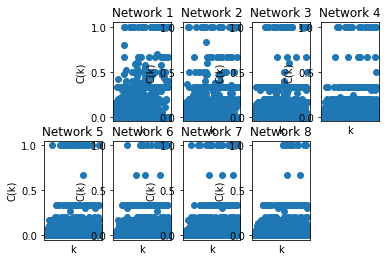

In [61]:
for p in range(1,9): #p/10=beta is probability of rewiring a new edge
    rewire(G, p/10)
    #j=0
    #for C in (G.subgraph(c).copy() for c in nx.connected_components(G)): #Print <L> of each network
    #    print("<L> of component "+str(j)+" for network number "+str(p)+": "+str(nx.average_shortest_path_length(C)))
    #    j=j+1
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True) #find gcc
    G0 = G.subgraph(Gcc[0])
    print("<L> for network number "+str(s)+": "+str(nx.average_shortest_path_length(G0))) #Print <L> of gcc of each network
    print("<C> for network number "+str(p)+": "+str(nx.average_clustering(G))) #Print <C> of each network
    nodes_clustering_coefficent=nx.clustering(G) #Plot C(k) of each network
    plt.subplot(2,5,p+1)
    plt.plot(list(nodes_clustering_coefficent.values()),'o')
    plt.ylabel('C(k)', fontsize=10)
    plt.xlabel('k', fontsize=10)
    plt.xticks([])
    plt.title('Network '+str(p))

In [62]:
#Since I rewired G, let's read in it again to reset it:
G = nx.read_edgelist(path_file)

In [63]:
#Now find centrality of each node
degree_cent = nx.degree_centrality(G)

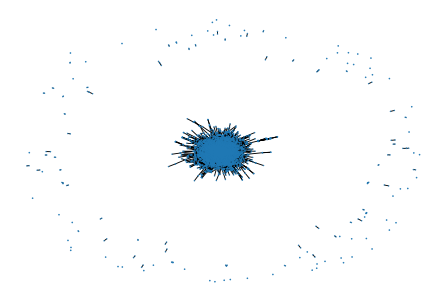

In [67]:
#Draw graph with node size proportional to its centrality
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size=[degree_cent[key] * 800 for key in degree_cent.keys()], edge_color='k', width= 0.9)

plt.show()

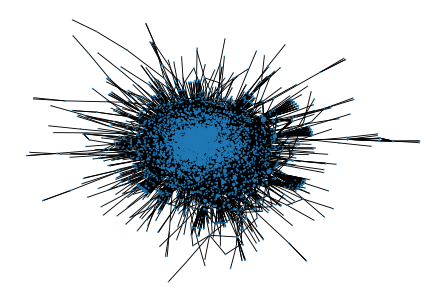

In [73]:
#Let's try this with just the gcc
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

degree_cent0 = nx.degree_centrality(G0)
pos0 = nx.spring_layout(G0)

nx.draw(G0, pos0, node_size=[degree_cent0[key] * 800 for key in degree_cent0.keys()], edge_color='k', width= 0.9)
plt.show()

In [68]:
#Find betweenness centrality
G_bet = nx.betweenness_centrality(G, normalized=True)

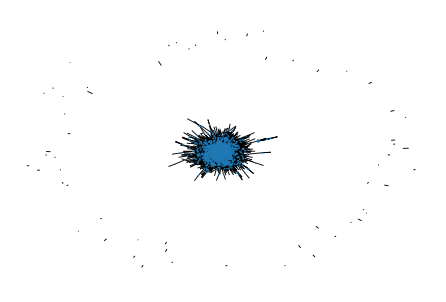

In [70]:
#Draw graph with node size proportional to betweenness centrality
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size=[G_bet[key] * 800 for key in G_bet.keys()], edge_color='k', width= 0.9)

plt.show()

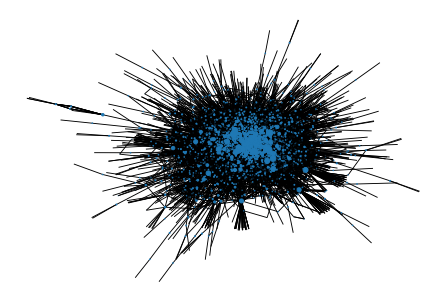

In [74]:
#Now with just the gcc
G0_bet = nx.betweenness_centrality(G0, normalized=True)
pos0 = nx.spring_layout(G0)

nx.draw(G0, pos0, node_size=[G0_bet[key] * 800 for key in G0_bet.keys()], edge_color='k', width= 0.9)
plt.show()

In [144]:
#Remove some of the most connected nodes from the gcc
#Create a copy of the gcc that we can remove nodes from
G01 = nx.Graph(G0) #This syntax is necessary (rather than G01 = G0) so that G01 won't be a 'frozen' graph from which nodes cannot be removed.

In [145]:
len(nx.degree_centrality(G01).values())

3985

In [146]:
#There are 3985 nodes in the gcc. Let's remove the 100 most connected ones.
#Remove i nodes with highest degree centrality
for i in range(100):
    G01.remove_node(max(nx.degree_centrality(G01), key=nx.degree_centrality(G01).get)) #remove node with highest degree centrality
    #G01.remove_node(max(degree_cent01, key=degree_cent01.get))
    #del degree_cent01[max(degree_cent01, key=degree_cent01.get)] #delete dictionary key with highest value

In [127]:
#When using the command G01.remove_node(max(degree_cent01, key=degree_cent01.get)), there was a discrepancy between
#nx.degree_centrality(G01) and degree_cent01 after deleting some nodes. I have since switched to using G01.remove_node(max(nx.degree_centrality(G01), key=nx.degree_centrality(G01).get))
#eqs1 = dict()
#eqs2 = dict()
#for key in degree_cent01:
#    if (key in nx.degree_centrality(G01) and degree_cent01[key] != nx.degree_centrality(G01)[key]):
#        eqs1[key] = degree_cent01[key]
#        eqs2[key] = nx.degree_centrality(G01)[key]

In [148]:
#reset degree centrality dictionary
degree_cent01 = nx.degree_centrality(G01)
pos01 = nx.spring_layout(G01)

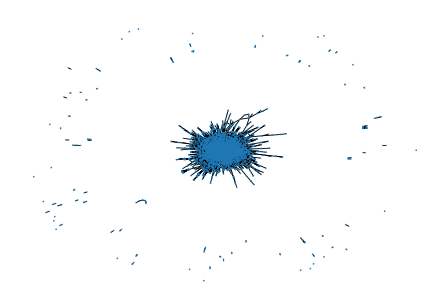

In [149]:
#Draw gcc without i nodes with highest degree centrality
nx.draw(G01, pos01, node_size=[degree_cent01[key] * 800 for key in degree_cent01.keys()], edge_color='k', width= 0.9)
plt.show()

In [159]:
#Many of the links in the gcc have been disconnected. Let's try this with betweenness centrality.
#Remove some of the most connected nodes from the gcc
#Create a copy of the gcc that we can remove nodes from
G02 = nx.Graph(G0) #This syntax is necessary (rather than G02 = G0) so that G02 won't be a 'frozen' graph from which nodes cannot be removed.

In [160]:
#There are 3985 nodes in the gcc. Let's remove the 100 most connected ones.
#Remove i nodes with highest betweenness centrality
for i in range(100):
    G02.remove_node(max(nx.betweenness_centrality(G02, normalized=True), key=nx.betweenness_centrality(G02, normalized=True).get)) #remove node with highest betweenness centrality

In [161]:
#reset betweenness centrality dictionary
G02_bet = nx.betweenness_centrality(G02, normalized=True)
pos02 = nx.spring_layout(G02)

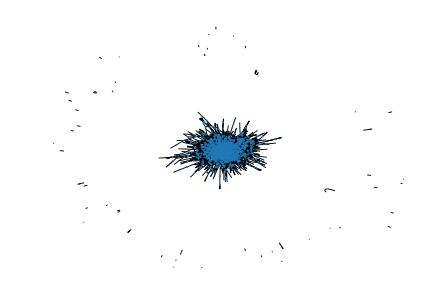

In [162]:
#Draw gcc without i nodes with highest betweenness centrality
nx.draw(G02, pos02, node_size=[G02_bet[key] * 800 for key in G02_bet.keys()], edge_color='k', width= 0.9)
plt.show()

In [175]:
#Again, many of the nodes have been disconnected. Now we perform community detection using the modularity algorithm (on the gcc).
# Import Newman, Clauset and Moore algortithm (https://arxiv.org/abs/cond-mat/0408187)
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G0))

In [176]:
#Find partition modularity Q
import networkx.algorithms.community as nx_comm

nx_comm.modularity(G0, nx_comm.label_propagation_communities(G0))

0.03458627820374142

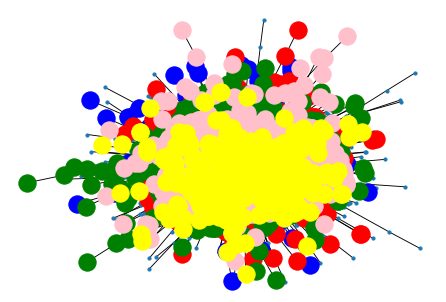

In [177]:
#Plot network colored by modules
pos = nx.spring_layout(G0)

nx.draw(G0, pos, edge_color='k', node_size= 10, width= 0.9)

nx.draw_networkx_nodes(G0, pos, nodelist=c[0], node_color='b')
nx.draw_networkx_nodes(G0, pos, nodelist=c[1], node_color='r')
nx.draw_networkx_nodes(G0, pos, nodelist=c[2], node_color='g')
nx.draw_networkx_nodes(G0, pos, nodelist=c[3], node_color='pink')
nx.draw_networkx_nodes(G0, pos, nodelist=c[4], node_color='yellow')
plt.show()

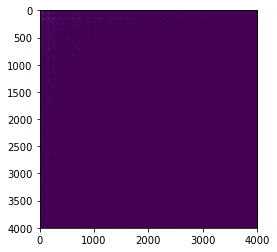

In [178]:
#Adjacency matrix
plt.imshow(nx.to_numpy_array(G0))
plt.show()

In [181]:
#assortativity vs disassortativity
#compute the average neighbour degree and the degree
avg_degree = nx.average_neighbor_degree(G)
degree = G.degree

x = []
y = []
for key in avg_degree.keys():
    x.append(degree[key])
    y.append(avg_degree[key])

In [182]:
avg_y=[]
y=np.array(y)
for i in np.unique(x):
     avg_y.append(np.mean(y[x==i]))

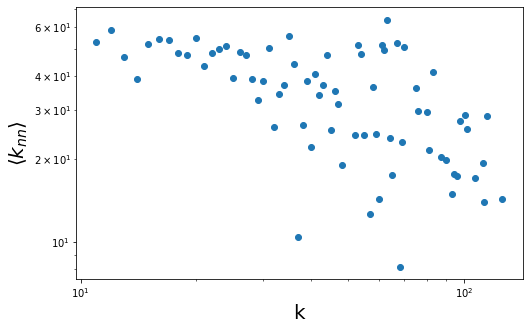

In [183]:
#Plot k_nn vs k
plt.figure(figsize=(8,5))

plt.plot(np.unique(x)[10:-13],avg_y[10:-13], marker="o", ls="None")
plt.xlabel("k",fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$",fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
#This network looks disassortative